# This notebook works on extracting unique named entities and organizations from KDD papers and passing them into a list.  

In [58]:
import pandas as pd
import numpy as np
import nltk
import os
import subprocess
import unicodedata
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from nltk import Tree
from nltk.tag import StanfordNERTagger
from nltk.tokenize import word_tokenize
import re
from operator import itemgetter
import polyglot

In [59]:
os.environ['PATH']

'//anaconda/envs/py27/bin:/Users/linwood/bin:/usr/local/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/opt/X11/bin:/usr/local/git/bin:/Users/linwood/.rvm/bin'

In [60]:
path        = os.path.abspath(os.getcwd())
TESTDIR     = os.path.normpath(os.path.join(os.path.expanduser("~"),"projects","LC3-Creations", "examples","KDDsample"))


In [175]:
a = unicode(subprocess.check_output(['pdf2txt.py',str(os.path.normpath(os.path.join(TESTDIR,"p59.pdf")))]),errors='ignore')
document = unicodedata.normalize('NFKD', a).encode('ascii','ignore').decode('unicode_escape').encode('ascii','ignore')



In [62]:
"returns named entity chunks in a given text"
tagged = nltk.pos_tag(nltk.word_tokenize(re.sub('[\s]'," ", document[:2000])))
entities = nltk.chunk.ne_chunk(tagged)
# Another entity extractor
st = StanfordNERTagger('/Users/linwood/stanford-corenlp-full-2015-04-20/classifiers/english.conll.4class.distsim.crf.ser.gz',
       '/Users/linwood/stanford-corenlp-full-2015-04-20/stanford-corenlp-3.5.2.jar',
       encoding='utf-8')
tokenized_text = word_tokenize(re.sub('[\s]'," ", document[:2000]))
stanentities = st.tag(tokenized_text)

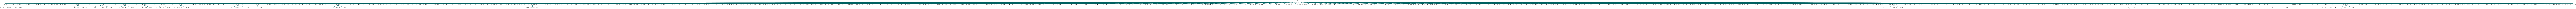

In [94]:
entities 

Below, I established two lists to hold the values that I extract from the text.  This itemgetter function will check for unique values.  First, I iterate over the extracted entities and see if the objects is a nltk.tree.Tree with a "Person" label.  If it is, and the length is equal to 1 (first or last name only), I append that value to the list. If it's larger, I iterate of the entity tree and pull out the first value only using itemgetter.  Then, I join the values from the list and append it to the destination list.  

In [64]:
from operator import itemgetter

persons = []
organizations = []

for l in entities:
    if isinstance(l,nltk.tree.Tree):
        if l.label() == 'PERSON':
            if len(l)== 1:
                if l[0][0] in persons:
                    pass
                else:
                    persons.append(l[0][0])
            else:
                if " ".join(map(itemgetter(0), l)) in persons:
                    pass
                else:
                    persons.append(" ".join(map(itemgetter(0), l)))
                    
for o in entities:
    if isinstance(o,nltk.tree.Tree):
        if o.label() == 'ORGANIZATION' or o.label() == 'GPE':
            if len(o)== 1:
                if o[0][0] in organizations:
                    pass
                else:
                    organizations.append(o[0][0])
            else:
                if " ".join(map(itemgetter(0), o)) in organizations:
                    pass
                else:
                    organizations.append(" ".join(map(itemgetter(0), o)))
                    
                
print persons
print
print
print organizations

['Timeline', 'Tim Althoff*', 'Xin Luna Dong', 'Kevin Murphy', 'Safa Alai', 'Van Dang', 'Wei Zhang', 'Stanford', 'Mountain View', 'Knowledge Base']


['Generation', 'Stanford University', 'TIMEMACHINE', 'Mechanical Turk', 'Subject', 'Experimentation', 'Timeline']


In [65]:
from operator import itemgetter

for o in entities:
    if isinstance(o,nltk.tree.Tree):
        if o.label() == 'ORGANIZATION' or o.label() == 'GPE':
            if len(o)>1:
                print " ".join(map(itemgetter(0), o))

Stanford University
Mechanical Turk


I tried to iterate over the extracted list of entities to get a better break between person's and their university name.  

In [66]:
tokens = [nltk.word_tokenize(l) for l in persons]
fin = [nltk.chunk.ne_chunk(nltk.pos_tag(l)) for l in tokens]
fin;

In [67]:
new =[word_tokenize(l) for l in persons]
stan = [st.tag(l) for l in new]
stan;

This function looks though an extracted stanford ner list, and finds continuous entitiy labels.  This should create first name, last name records of entities.  

In [68]:
def get_continuous_chunks(tagged_sent):
    continuous_chunk = []
    current_chunk = []

    for token, tag in tagged_sent:
        if tag != "O":
            current_chunk.append((token, tag))
        else:
            if current_chunk: # if the current chunk is not empty
                continuous_chunk.append(current_chunk)
                current_chunk = []
    # Flush the final current_chunk into the continuous_chunk, if any.
    if current_chunk:
        continuous_chunk.append(current_chunk)
    return continuous_chunk

ne_tagged_sent = [('Rami', 'PERSON'), ('Eid', 'PERSON'), ('is', 'O'), ('studying', 'O'), ('at', 'O'), ('Stony', 'ORGANIZATION'), ('Brook', 'ORGANIZATION'), ('University', 'ORGANIZATION'), ('in', 'O'), ('NY', 'LOCATION')]

named_entities = get_continuous_chunks(ne_tagged_sent)
named_entities = get_continuous_chunks(ne_tagged_sent)
named_entities_str = [" ".join([token for token, tag in ne]) for ne in named_entities]
named_entities_str_tag = [(" ".join([token for token, tag in ne]), ne[0][1]) for ne in named_entities]


In [69]:
named_entities = get_continuous_chunks(stanentities)
named_entities_str = [" ".join([token for token, tag in ne]) for ne in named_entities]
named_entities_str

[u'Knowledge-Base Entities TimeMachine',
 u'Tim Althoff*',
 u'Xin Luna Dong',
 u'Kevin Murphy',
 u'Safa Alai',
 u'Van Dang',
 u'Wei Zhang',
 u'Science Department',
 u'Stanford University',
 u'Stanford',
 u'Google',
 u'Amphitheatre Parkway',
 u'Mountain View',
 u'Mechanical Turk',
 u'Database',
 u'Algorithms',
 u'Summarization',
 u'Knowledge Base']

In [70]:
list1 = range(10)

In [71]:
list2 = [i for i in xrange(7,17,1)]


In [72]:
set(list1) & set(list2)

{7, 8, 9}

In [73]:
def parts_of_speech(corpus):
    "returns named entity chunks in a given text"
    tagged = nltk.pos_tag(nltk.word_tokenize(corpus))
    entities = nltk.chunk.ne_chunk(tagged)
    # Another entity extractor
    st = StanfordNERTagger('/Users/linwood/stanford-corenlp-full-2015-04-20/classifiers/english.muc.7class.distsim.crf.ser.gz',
           '/Users/linwood/stanford-corenlp-full-2015-04-20/stanford-corenlp-3.5.2.jar',
           encoding='utf-8')
    tokenized_text = word_tokenize(corpus)
    stanentities = st.tag(tokenized_text)
    return entities
def find_entities(chunks):
    "given list of tagged parts of speech, returns unique named entities"

    def traverse(tree):
        "recursively traverses an nltk.tree.Tree to find named entities"
        entity_names = []
    
        if hasattr(tree, 'node') and tree.node:
            if tree.node == 'NE':
                entity_names.append(' '.join([child[0] for child in tree]))
            else:
                for child in tree:
                    entity_names.extend(traverse(child))
    
        return entity_names
    
    named_entities = []
    
    for chunk in chunks:
        entities = sorted(list(set([word for tree in chunk
                            for word in traverse(tree)])))
        for e in entities:
            if e not in named_entities:
                named_entities.append(e)
    return named_entities

In [76]:
import os
os.getcwd()

'/Users/linwood/projects/LC3-Creations/notebooks'

In [180]:
from polyglot.text import Text

e=Text(re.sub('[\s]'," ",document[:10000])).entities
e[0].tag

u'I-PER'

In [179]:
Text(re.sub('[\s]'," ",document[:10000])).entities

[I-PER([u'Albert', u'Bifet']),
 I-ORG([u'HUAWEI', u'Hong', u'Kong']),
 I-PER([u'Jesse', u'Read']),
 I-ORG([u'Jesse', u'Read', u'HIIT', u'Aalto', u'University', u'Helsinki']),
 I-LOC([u'Finland']),
 I-ORG([u'Finland', u'jesse.read']),
 I-ORG([u'aalto']),
 I-PER([u'Gianmarco', u'De', u'Francisci']),
 I-ORG([u'Gianmarco', u'De', u'Francisci', u'Morales', u'Aalto', u'University', u'Helsinki']),
 I-LOC([u'Finland']),
 I-PER([u'Geoff', u'Holmes']),
 I-PER([u'Bernhard', u'Pfahringer']),
 I-ORG([u'Bernhard', u'Pfahringer', u'University', u'of', u'Waikato']),
 I-LOC([u'Bernhard', u'Pfahringer', u'University', u'of', u'Waikato', u'Hamilton', u',', u'New', u'Zealand']),
 I-PER([u'bernhard']),
 I-PER([u'KDD']),
 I-LOC([u'Sydney']),
 I-LOC([u'NSW']),
 I-LOC([u'Australia']),
 I-ORG([u'ACM']),
 I-ORG([u'ACM']),
 I-ORG([u'Apache']),
 I-PER([u'Apache', u'SAMOA1']),
 I-PER([u'Japkowicz']),
 I-LOC([u'samoa']),
 I-PER([u'classiers']),
 I-LOC([u'classiers']),
 I-PER([u'Vowpal']),
 I-PER([u'mance']),
 I-PER

In [ ]:
re.sub('[\s]'," ",document)

In [181]:
from polyglot.downloader import downloader
print(downloader.supported_languages_table("ner2", 3))

  1. Polish                     2. Turkish                    3. Indonesian               
  4. Thai                       5. Czech                      6. Arabic                   
  7. Korean                     8. Catalan; Valencian         9. Italian                  
 10. Malay                     11. Romanian, Moldavian, ...  12. Tagalog                  
 13. Danish                    14. Finnish                   15. German                   
 16. Persian                   17. Latvian                   18. Chinese                  
 19. French                    20. Portuguese                21. Hebrew (modern)          
 22. Slovak                    23. Slovene                   24. Bulgarian                
 25. Hindi                     26. Japanese                  27. Hungarian                
 28. Croatian                  29. Ukrainian                 30. Serbian                  
 31. Lithuanian                32. Norwegian                 33. Dutch                    

In [214]:
Text(re.sub('[\s]'," ",(document[len(document)-(len(document)/10):len(document)]))).entities

[I-ORG([u'dow']),
 I-LOC([u'Asuncion']),
 I-LOC([u'D.J']),
 I-PER([u'Newman']),
 I-ORG([u'UCI']),
 I-PER([u'Albert', u'Bifet']),
 I-PER([u'Ricard', u'Gavald']),
 I-PER([u'Albert', u'Bifet']),
 I-PER([u'Geo', u'Holmes']),
 I-PER([u'Richard', u'Kirkby']),
 I-PER([u'Bernhard', u'Pfahringer']),
 I-ORG([u'Machine', u'Learning', u'Research']),
 I-PER([u'Albert', u'Bifet']),
 I-PER([u'Geo', u'Holmes']),
 I-PER([u'Bernhard', u'Pfahringer']),
 I-PER([u'PKDD']),
 I-LOC([u'Berlin']),
 I-LOC([u'Heidelberg']),
 I-ORG([u'Springer']),
 I-ORG([u'Verlag']),
 I-PER([u'Avrim', u'Blum']),
 I-PER([u'Adam', u'Kalai']),
 I-PER([u'John', u'Langford']),
 I-PER([u'Leo', u'Breiman']),
 I-PER([u'Friedman']),
 I-LOC([u'Wadsworth']),
 I-PER([u'Jacob', u'Cohen']),
 I-PER([u'De', u'Francisci', u'Morales']),
 I-PER([u'Albert', u'Bifet']),
 I-LOC([u'SAMOA']),
 I-ORG([u'Machine', u'Learning', u'Research']),
 I-LOC([u'samoa']),
 I-PER([u'Janez', u'Demsar']),
 I-ORG([u'Machine', u'Learning', u'Research']),
 I-PER([u'Thoma

In [202]:
Text(re.sub('[\s]'," ",document[:-10000])).entities

[I-PER([u'Albert', u'Bifet']),
 I-ORG([u'HUAWEI', u'Hong', u'Kong']),
 I-PER([u'Jesse', u'Read']),
 I-ORG([u'Jesse', u'Read', u'HIIT', u'Aalto', u'University', u'Helsinki']),
 I-LOC([u'Finland']),
 I-ORG([u'Finland', u'jesse.read']),
 I-ORG([u'aalto']),
 I-PER([u'Gianmarco', u'De', u'Francisci']),
 I-ORG([u'Gianmarco', u'De', u'Francisci', u'Morales', u'Aalto', u'University', u'Helsinki']),
 I-LOC([u'Finland']),
 I-PER([u'Geoff', u'Holmes']),
 I-PER([u'Bernhard', u'Pfahringer']),
 I-ORG([u'Bernhard', u'Pfahringer', u'University', u'of', u'Waikato']),
 I-LOC([u'Bernhard', u'Pfahringer', u'University', u'of', u'Waikato', u'Hamilton', u',', u'New', u'Zealand']),
 I-PER([u'bernhard']),
 I-PER([u'KDD']),
 I-LOC([u'Sydney']),
 I-LOC([u'NSW']),
 I-LOC([u'Australia']),
 I-ORG([u'ACM']),
 I-ORG([u'ACM']),
 I-ORG([u'Apache']),
 I-PER([u'Apache', u'SAMOA1']),
 I-PER([u'Japkowicz']),
 I-LOC([u'samoa']),
 I-PER([u'classiers']),
 I-LOC([u'classiers']),
 I-PER([u'Vowpal']),
 I-PER([u'mance']),
 I-PER

In [185]:
re.sub('[\s]'," ",document[43710:43730])

'W1| > 2\x01cut, where  '

In [186]:
for l in e:
    if l.tag == 'I-PER':
        print "I am"
    else:
        print "No"

I am
No
I am
No
No
No
No
I am
No
No
I am
I am
No
No
I am
I am
No
No
No
No
No
No
I am
I am
No
I am
No
I am
I am
I am
I am
No
I am
I am
I am


This code iterates over the polyglot extracted entities and creates a list of person, locations, and organizations

In [199]:
import itertools
import unicodedata

def entityextraction(e):
    

    current_person =[]
    persons =[]
    current_org=[]
    organizations=[]
    current_loc=[]
    locations=[]

    for l in e:
        if l.tag == 'I-PER':
            for m in l:
                current_person.append(unicodedata.normalize('NFKD', m).encode('ascii','ignore'))
            else:
                    if current_person: # if the current chunk is not empty
                        persons.append(" ".join(current_person))
                        current_person = []
        elif l.tag == 'I-ORG':
            for m in l:
                current_org.append(unicodedata.normalize('NFKD', m).encode('ascii','ignore'))
            else:
                    if current_org: # if the current chunk is not empty
                        organizations.append(" ".join(current_org))
                        current_org = []
        elif l.tag == 'I-LOC':
            for m in l:
                current_loc.append(unicodedata.normalize('NFKD', m).encode('ascii','ignore'))
            else:
                    if current_loc: # if the current chunk is not empty
                        locations.append(" ".join(current_loc))
                        current_loc = []

    return [persons,organizations,locations]

In [200]:
entityextraction(e)[]

['Albert Bifet',
 'Jesse Read',
 'Gianmarco De Francisci',
 'Geoff Holmes',
 'Bernhard Pfahringer',
 'bernhard',
 'KDD',
 'Apache SAMOA1',
 'Japkowicz',
 'classiers',
 'Vowpal',
 'mance',
 'mance',
 'Gama',
 'Friedman',
 'Shah',
 'Cohen']

In [136]:
for l in e:
    print itertools.chain(l)

ValueError: too many values to unpack

In [119]:
def more_continuous_chunks(tagged_sent):
    continuous_chunk = []
    current_chunk = []

    for piece in e:
        if piece.tag == 'I-PER':
            current_chunk.append((piece))
        else:
            if current_chunk: # if the current chunk is not empty
                continuous_chunk.append(current_chunk)
                current_chunk = []
    # Flush the final current_chunk into the continuous_chunk, if any.
    if current_chunk:
        continuous_chunk.append(current_chunk)
    return continuous_chunk

In [120]:
more_continuous_chunks(e)

[[I-PER([u'Tim', u'Althoff']),
  I-PER([u'Xin', u'Luna', u'Dong']),
  I-PER([u'Kevin', u'Murphy']),
  I-PER([u'Safa']),
  I-PER([u'Van', u'Dang']),
  I-PER([u'Wei', u'Zhang'])]]